In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [20]:
file_path = './데이터/Data_final.xlsx'
columns_to_use = ['나이', '사고시간', '사고장소', '사고부위', '사고당시활동', '사고연도']
data = pd.read_excel(file_path, usecols=columns_to_use)
data_original = data.copy()
data

,사고시간,사고장소,사고부위,사고당시활동,사고연도,나이
0,수업시간,부속시설,다리,기타운동,2019,중학생
1,등하교,통로,치아(구강),보행/주행,2019,초등학생 저학년
2,체육수업,부속시설,손,구기운동,2019,중학생
3,휴식시간 및 청소시간,운동장,머리(두부),장난/놀이,2019,초등학생 저학년
4,체육수업,부속시설,발,보행/주행,2019,중학생
...,...,...,...,...,...,...
611765,쉬는시간,교실,팔,장난/놀이,2023,중학생
611766,쉬는시간,통로,다리,식사/수면/휴식,2023,중학생
611767,특별활동,운동장,손,구기운동,2023,중학생
611768,식사시간,부속시설,발,장난/놀이,2023,중학생


In [21]:
data = data_original
data

,사고시간,사고장소,사고부위,사고당시활동,사고연도,나이
0,수업시간,부속시설,다리,기타운동,2019,중학생
1,등하교,통로,치아(구강),보행/주행,2019,초등학생 저학년
2,체육수업,부속시설,손,구기운동,2019,중학생
3,휴식시간 및 청소시간,운동장,머리(두부),장난/놀이,2019,초등학생 저학년
4,체육수업,부속시설,발,보행/주행,2019,중학생
...,...,...,...,...,...,...
611765,쉬는시간,교실,팔,장난/놀이,2023,중학생
611766,쉬는시간,통로,다리,식사/수면/휴식,2023,중학생
611767,특별활동,운동장,손,구기운동,2023,중학생
611768,식사시간,부속시설,발,장난/놀이,2023,중학생


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611770 entries, 0 to 611769
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   사고시간    611770 non-null  object
 1   사고장소    611770 non-null  object
 2   사고부위    611770 non-null  object
 3   사고당시활동  611770 non-null  object
 4   사고연도    611770 non-null  int64 
 5   나이      611770 non-null  object
dtypes: int64(1), object(5)
memory usage: 28.0+ MB


In [23]:
# '사고연도'가 2023인 데이터만 필터링합니다.
data_2023 = data[data['사고연도'] == 2023]

# '나이' 컬럼에서 원하는 값만 남기고 나머지 데이터는 제거합니다.
age_categories = ['초등학생 저학년', '초등학생 고학년', '중학생', '고등학생', '유치원생']
filtered_data = data_2023[data_2023['나이'].isin(age_categories)].copy()

# '사고연도' 컬럼을 드랍합니다.
filtered_data = filtered_data.drop(columns=['사고연도'])

# 데이터의 첫 몇 행을 확인합니다.
filtered_data.head()

,사고시간,사고장소,사고부위,사고당시활동,나이
418725,체육활동,부속시설,팔,구기운동,중학생
418779,쉬는시간,통로,발,보행/주행,초등학생 고학년
418801,수업시간,교실,손,실험실습,중학생
418802,특별활동,부속시설,손,구기운동,중학생
418924,체육활동,부속시설,머리(두부),공부,중학생


In [24]:
# 데이터 샘플링 (예: 1000개 샘플)
sampled_data = filtered_data.sample(n=1000, random_state=42)

In [25]:
sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 608592 to 540753
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사고시간    1000 non-null   object
 1   사고장소    1000 non-null   object
 2   사고부위    1000 non-null   object
 3   사고당시활동  1000 non-null   object
 4   나이      1000 non-null   object
dtypes: object(5)
memory usage: 46.9+ KB


In [26]:
# 카테고리형 데이터를 수치형으로 변환합니다.
label_encoders = {}
for column in sampled_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    sampled_data.loc[:, column] = le.fit_transform(sampled_data[column])
    label_encoders[column] = le

In [27]:
# 데이터를 numpy 배열로 변환합니다.
X = sampled_data.values

In [28]:
# 데이터를 표준화합니다.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
# DBSCAN 파라미터 설정 및 모델 생성
eps_values = [0.1, 0.5, 1.0]
min_samples_values = [5, 10, 20]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X_scaled)
        
        labels = dbscan.labels_
        unique_labels = np.unique(labels)
        
        print(f'eps: {eps}, min_samples: {min_samples}, clusters: {unique_labels}')

eps: 0.1, min_samples: 5, clusters: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29]
eps: 0.1, min_samples: 10, clusters: [-1  0  1  2  3  4  5  6  7  8  9 10]
eps: 0.1, min_samples: 20, clusters: [-1  0  1]
eps: 0.5, min_samples: 5, clusters: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29]
eps: 0.5, min_samples: 10, clusters: [-1  0  1  2  3  4  5  6  7  8  9 10]
eps: 0.5, min_samples: 20, clusters: [-1  0  1  2]
eps: 1.0, min_samples: 5, clusters: [-1  0  1  2  3]
eps: 1.0, min_samples: 10, clusters: [-1  0  1  2  3]
eps: 1.0, min_samples: 20, clusters: [-1  0  1  2]


In [30]:
best_eps = 1.0
best_min_samples = 20

In [31]:
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan.fit(X_scaled)

DBSCAN(eps=1.0, min_samples=20)

In [32]:
# 클러스터 라벨을 예측합니다.
labels = dbscan.labels_

In [33]:
# 결과를 데이터프레임에 추가합니다.
sampled_data['Cluster'] = labels

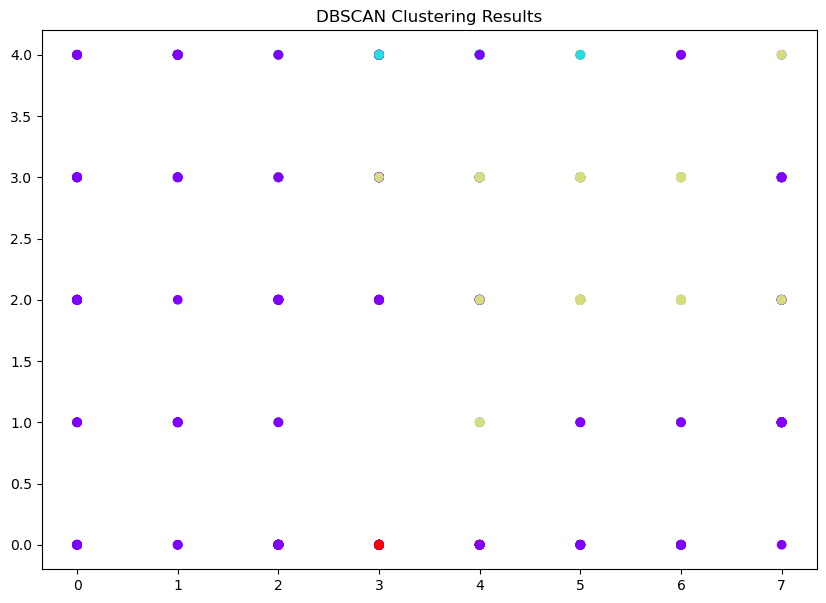

In [34]:
# 클러스터링 결과를 시각화합니다.
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.title("DBSCAN Clustering Results")
plt.show()

In [35]:
# 원본 데이터로 되돌리기 위해 레이블 역변환
for column, le in label_encoders.items():
    # 데이터 타입을 정수형으로 변환
    sampled_data[column] = sampled_data[column].astype(int)
    sampled_data[column] = le.inverse_transform(sampled_data[column])

In [36]:
# 결과물을 새로운 파일로 저장
output_file_path = './데이터/clustering.xlsx'
sampled_data.to_excel(output_file_path, index=False)

# 저장된 파일 경로 출력
print(f'Predicted data saved to {output_file_path}')

Predicted data saved to ./데이터/clustering.xlsx
